In [184]:
import random
import timeit 
import matplotlib.pyplot as plt
import numpy as np
import math

In [185]:
class Graph:

    # using hash map
    def __init__(self, edges):
        self.graph = {}
        for x,y in edges:
            if x not in self.graph.keys():
                self.graph[x]=[]
            self.graph[x].append(y)
            # undirected
            if y not in self.graph.keys():
                self.graph[y]=[]
            self.graph[y].append(x)

    def has_edge(self, src, dst):
        value = True if src in self.graph[dst] or dst in self.graph[src] else False
        return value
    
    def add_edge(self,node1, node2):
        if node1 not in self.graph.keys():
            self.graph[node1]=[]
        self.graph[node1].append(node2)
        if node2 not in self.graph.keys():
            self.graph[node2]=[]
        self.graph[node2].append(node1)

    def get_edges(self, node):
        return self.graph[node]

    def get_graph_size(self,):
        return len(self.graph)
    
    def get_nodes(self,):
        return self.graph.keys()
    
    def get_graph(self,):
        return self.graph
    
    # Part 1.3
    def has_cycle(self,):
        seen = set()
        onpath = [False] * self.get_graph_size()
        pathdepth = [0] * self.get_graph_size()
        for node in self.graph.keys():
            if node not in seen:
                if has_cycle_each(self, node, seen, onpath, pathdepth, 0):
                    return True
        return False
    
    # Part 1.4
    def is_connected(self,):
        seen = set()
        id = [-1] * self.get_graph_size()
        count = 0
        for node in self.graph.keys():
            if node not in seen:
                dfs_count(self, node, seen, id, count)
                count = count + 1
        for i in self.graph.keys():
            if id[i] != 0:
                return False
        return True
    
    # Part 1.5
    def add_node(self, node):
        if node not in self.graph.keys():
            self.graph[node] = []
            

In [186]:
# Part 1.1
def BFS2(G, n1, n2):
    stack = [[n1]]
    graph = G.get_graph()
    seen = set()
    seen.add(n1)

    while len(stack) > 0:
        path = stack[0]
        node = path[-1]
        stack = stack[1:]
        for nn in graph[node]:
            if nn not in seen:
                new_path = list(path)
                new_path.append(nn)
                stack.append(new_path)
                seen.add(nn)
                if nn == n2:
                    return new_path

g1 = Graph([[0,1],[1,2],[2,0],[3,2],[4,3],[5,4],[6,5]])
print(BFS2(g1, 0, 6))

def DFS2(G, n1, n2):
    stack = [[n1]]
    graph = G.get_graph()
    seen = set()
    seen.add(n1)

    while len(stack) !=0:
        path = stack.pop()
        node = path[-1]
        for nn in graph[node]:
            if nn not in seen: 
                new_path = list(path)
                new_path.append(nn)
                stack.append(new_path)
                seen.add(nn)
                if nn == n2:
                    return new_path
print(DFS2(g1, 0, 6))                

[0, 2, 3, 4, 5, 6]
[0, 2, 3, 4, 5, 6]


In [187]:
# Part 1.2
def BFS3(G, node):
    stack = [node]
    graph = G.get_graph()
    seen = set()
    predecessor = {}
    seen.add(node)

    while len(stack) !=0:
        n1 = stack[0]
        stack = stack[1:]
        for nn in graph[n1]:
            if nn not in seen: 
                stack.append(nn)
                seen.add(nn)
                predecessor[nn] = n1
    return predecessor
print(BFS3(g1,0))
def DFS3(G, node):
    stack = [node]
    graph = G.get_graph()
    seen = set()
    predecessor = {}
    seen.add(node)

    while len(stack) !=0:
        n1 = stack.pop()
        for nn in graph[n1]:
            if nn not in seen: 
                stack.append(nn)
                seen.add(nn)
                predecessor[nn] = n1
    return predecessor
print(DFS3(g1,0))


{1: 0, 2: 0, 3: 2, 4: 3, 5: 4, 6: 5}
{1: 0, 2: 0, 3: 2, 4: 3, 5: 4, 6: 5}


In [188]:
# Part 1.3
def has_cycle_each(G, node, seen, onpath, pathdepth, depth):
    graph = G.get_graph()
    depth = depth + 1
    seen.add(node)
    onpath[node] = True
    pathdepth[node] = depth

    for nn in graph[node]:
        if onpath[nn]:
            if pathdepth[nn] < depth - 1:
                return True
        if nn not in seen:
            result = has_cycle_each(G, nn, seen, onpath, pathdepth, depth)
            if result == True:
                return True
    onpath[node] = False
    return False

print(g1.has_cycle())

True


In [195]:
# Part 1.4
def dfs_count(G, node, seen, id, count):
    graph = G.get_graph()
    seen.add(node)
    id[node] = count
    for nn in graph[node]:
        if nn not in seen:
            dfs_count(G,nn,seen,id,count)
g2 = Graph([[0,1],[1,2],[2,3]])
print(g2.is_connected())
    

True


In [190]:
# Part 1.5
def create_random_graph(n,e):
    g = Graph([])
    graph = g.get_graph()
    for i in range(n):
        g.add_node(i)
    for _ in range(e):
        n1 = random.randint(0,n-1)
        n2 = random.randint(0,n-1)
        while n1 == n2 or n2 in graph[n1]:  # n1 and n2 are different
            n1 = random.randint(0,n-1)
            n2 = random.randint(0,n-1)
        g.add_edge(n1,n2)
    return g

g = create_random_graph(10,5)
print(g.get_nodes())
print(g.get_graph())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
{0: [3, 7], 1: [], 2: [9], 3: [0], 4: [], 5: [9], 6: [8], 7: [0], 8: [6], 9: [2, 5]}


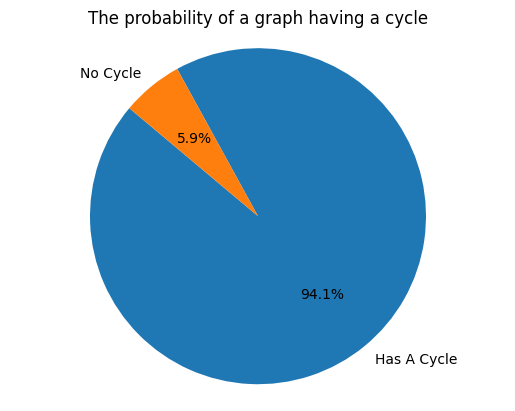

In [191]:
runs = 1000
cycle_count = 0
for _ in range(runs):
    my_graph = create_random_graph(100,70)
    if my_graph.has_cycle():
        cycle_count += 1
plt.pie([cycle_count, runs - cycle_count], labels=["Has A Cycle", "No Cycle"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('The probability of a graph having a cycle')
plt.show()

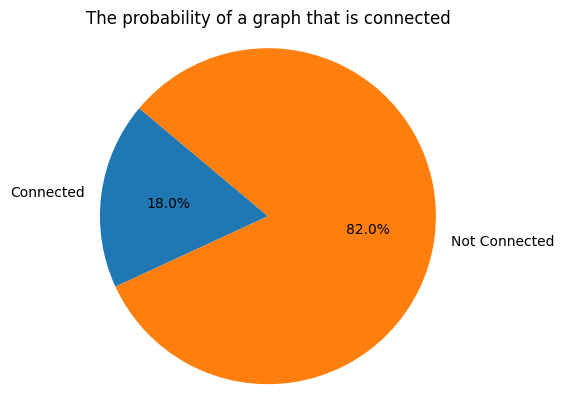

In [201]:
runs = 1000
count = 0
for _ in range(runs):
    my_graph = create_random_graph(100,200)
    if my_graph.is_connected():
        count += 1
plt.pie([count, runs - count], labels=["Connected", "Not Connected"], autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('The probability of a graph that is connected')
plt.show()